In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from datetime import datetime
now = datetime.now()

import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Shardul Pharande\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Reading pre-processed Dataset

We have pre-processed the dataset as part of EDA during the last assignment

In [2]:
customer_data = pd.read_csv("../Dataset/marketing_campaign_eng.csv", index_col='ID', infer_datetime_format=True)

In [3]:
customer_data.head()

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
ID                                                                           
5524  Graduation  58138.0        0         0       58       635         88   
2174  Graduation  46344.0        1         1       38        11          1   
4141  Graduation  71613.0        0         0       26       426         49   
6182  Graduation  26646.0        1         0       26        11          4   
5324         PhD  58293.0        1         0       94       173         43   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
ID                                                                       
5524              546              172                88            88   
2174                6                2                 1             6   
4141              127              111                21            42   
6182               20               10                 3             5   
5324              118               46                27            15   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
ID                                                              
5524                  3                8                   10   
2174                  2                1                    1   
4141                  1                8                    2   
6182                  2                2                    0   
5324                  5                5                    3   

      NumStorePurchases  NumWebVisitsMonth  Complain  Response  Age  \
ID                                                                    
5524                  4                  7         0         1   65   
2174                  2                  5         0         0   68   
4141                 10                  4         0         0   57   
6182                  4                  6         0         0   38   
5324                  6                  5         0         0   41   

      Days_Since_Customer  Marital_Status_Ct  Num_Kids  Tot_Cmp_Accepted  \
ID                                                                         
5524          3873.586824                  1         0                 0   
2174          3027.586824                  1         2                 0   
4141          3374.586824                  2         0                 0   
6182          2967.586824                  2         1                 0   
5324          3223.586824                  2         1                 0   

      Itm_Total  
ID               
5524       2252  
2174         38  
4141       1202  
6182         64  
5324        595

In [4]:
customer_data.dtypes

Education               object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Complain                 int64
Response                 int64
Age                      int64
Days_Since_Customer    float64
Marital_Status_Ct        int64
Num_Kids                 int64
Tot_Cmp_Accepted         int64
Itm_Total                int64
dtype: object

In [5]:
# Changing object data type to categorical
customer_data['Education'] = pd.Categorical(customer_data.Education)

In [6]:
#Education column has 5 unique values
print(customer_data.Education.unique())
print(customer_data.Education.value_counts())

['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']
Categories (5, object): ['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD']
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


In [7]:
#Converting all categorical to numeric using cat codes
cat_columns = customer_data.select_dtypes(['category']).columns
customer_data[cat_columns] = customer_data[cat_columns].apply(lambda x: x.cat.codes)

In [8]:
customer_data.head()

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
ID                                                                          
5524          2  58138.0        0         0       58       635         88   
2174          2  46344.0        1         1       38        11          1   
4141          2  71613.0        0         0       26       426         49   
6182          2  26646.0        1         0       26        11          4   
5324          4  58293.0        1         0       94       173         43   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
ID                                                                       
5524              546              172                88            88   
2174                6                2                 1             6   
4141              127              111                21            42   
6182               20               10                 3             5   
5324              118               46                27            15   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
ID                                                              
5524                  3                8                   10   
2174                  2                1                    1   
4141                  1                8                    2   
6182                  2                2                    0   
5324                  5                5                    3   

      NumStorePurchases  NumWebVisitsMonth  Complain  Response  Age  \
ID                                                                    
5524                  4                  7         0         1   65   
2174                  2                  5         0         0   68   
4141                 10                  4         0         0   57   
6182                  4                  6         0         0   38   
5324                  6                  5         0         0   41   

      Days_Since_Customer  Marital_Status_Ct  Num_Kids  Tot_Cmp_Accepted  \
ID                                                                         
5524          3873.586824                  1         0                 0   
2174          3027.586824                  1         2                 0   
4141          3374.586824                  2         0                 0   
6182          2967.586824                  2         1                 0   
5324          3223.586824                  2         1                 0   

      Itm_Total  
ID               
5524       2252  
2174         38  
4141       1202  
6182         64  
5324        595

In [9]:
customer_data.dtypes

Education                 int8
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Complain                 int64
Response                 int64
Age                      int64
Days_Since_Customer    float64
Marital_Status_Ct        int64
Num_Kids                 int64
Tot_Cmp_Accepted         int64
Itm_Total                int64
dtype: object

In [10]:
print("['Graduation' : 2, 'PhD' : 4, 'Master' : 3, 'Basic' : 1, '2n Cycle' : 0]\n")
print(customer_data.Education.unique())
print(customer_data.Education.value_counts())

['Graduation' : 2, 'PhD' : 4, 'Master' : 3, 'Basic' : 1, '2n Cycle' : 0]

[2 4 3 1 0]
2    1127
4     486
3     370
0     203
1      54
Name: Education, dtype: int64


# Dimensionality Reduction
## Imports

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import plotly.graph_objects as go

## Scaling

In [12]:
dataC = customer_data.copy()
scaler = StandardScaler()
dataC = scaler.fit_transform(dataC)
scaled_data = pd.DataFrame(dataC, columns= customer_data.columns)
print("Dataset after scaling:")
scaled_data.head()

Dataset after scaling:


Education    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0  -0.350141  0.235327 -0.825218 -0.929894  0.307039  0.983781   1.551577   
1  -0.350141 -0.235826  1.032559  0.906934 -0.383664 -0.870479  -0.636301   
2  -0.350141  0.773633 -0.825218 -0.929894 -0.798086  0.362723   0.570804   
3  -0.350141 -1.022732  1.032559 -0.929894 -0.798086 -0.870479  -0.560857   
4   1.428354  0.241519  1.032559 -0.929894  1.550305 -0.389085   0.419916   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0         1.679702         2.462147          1.476500      0.843207   
1        -0.713225        -0.650449         -0.631503     -0.729006   
2        -0.177032         1.345274         -0.146905     -0.038766   
3        -0.651187        -0.503974         -0.583043     -0.748179   
4        -0.216914         0.155164         -0.001525     -0.556446   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0           0.349414         1.409304             2.510890          -0.550785   
1          -0.168236        -1.110409            -0.568720          -1.166125   
2          -0.685887         1.409304            -0.226541           1.295237   
3          -0.168236        -0.750450            -0.910898          -0.550785   
4           1.384715         0.329427             0.115638           0.064556   

   NumWebVisitsMonth  Complain  Response       Age  Days_Since_Customer  \
0           0.693904 -0.097282  2.388846  0.985345             1.976745   
1          -0.130463 -0.097282 -0.418612  1.235733            -1.667011   
2          -0.542647 -0.097282 -0.418612  0.317643            -0.172468   
3           0.281720 -0.097282 -0.418612 -1.268149            -1.925433   
4          -0.130463 -0.097282 -0.418612 -1.017761            -0.822831   

   Marital_Status_Ct  Num_Kids  Tot_Cmp_Accepted  Itm_Total  
0          -1.346874 -1.264505         -0.439037   1.466973  
1          -1.346874  1.396361         -0.439037  -0.952725  
2           0.742460 -1.264505         -0.439037   0.319420  
3           0.742460  0.065928         -0.439037  -0.924309  
4           0.742460  0.065928         -0.439037  -0.343975

## PCA

In [33]:
scaled_dataC = scaled_data.copy()
pca = PCA(n_components = 3,random_state = 42)
scaled_dataC = pca.fit_transform(scaled_dataC)
PCA_customer_data = pd.DataFrame(scaled_dataC, columns=["col1","col2", "col3"])

print("Let's have a glimpse of the PCA transformed dataset :")
PCA_customer_data.head()

Let's have a glimpse of the PCA transformed dataset :


col1      col2      col3
0  4.456869  0.124419  2.479980
1 -2.885769  0.144040 -1.520573
2  1.964414 -0.698630 -0.681041
3 -2.682921 -1.776209 -0.202634
4 -0.508616 -0.005824 -0.392733

In [14]:
x = PCA_customer_data["col1"]
y = PCA_customer_data["col2"]
z = PCA_customer_data["col3"]

print(f"Let's have a look on the dataset after dimensionality reduction :")

fig = go.Figure(data = [go.Scatter3d(x=x, y=y, z=z,mode='markers',
                marker = dict(size=10, color="#682F2F", opacity=0.8))])
fig.update_layout(title=dict(text= "Dataset After Diemsionality Reduction[3D Projection]",
                             y=0.97,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  scene=dict(xaxis = dict(title="col1",backgroundcolor="#D4C8BA",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white"),
                             yaxis = dict(title="col2",backgroundcolor="#D4C8BA",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white"),
                             zaxis = dict(title="col3",backgroundcolor="#D4C8BA",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white")),
                  margin=dict(l=0, r=0, b=0, t=0),paper_bgcolor="#D4C8BA")
fig.show()

Let's have a look on the dataset after dimensionality reduction :


# Clustering
## KMeans

In [15]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

In [16]:
PCA_customer_data.dtypes

col1    float64
col2    float64
col3    float64
dtype: object

We have a total of 3 attributes, we will use Elbow Method to determine the number of clusters to be formed.

We will be using KMeans mode for the elbow method and and start k parameter at k = 10

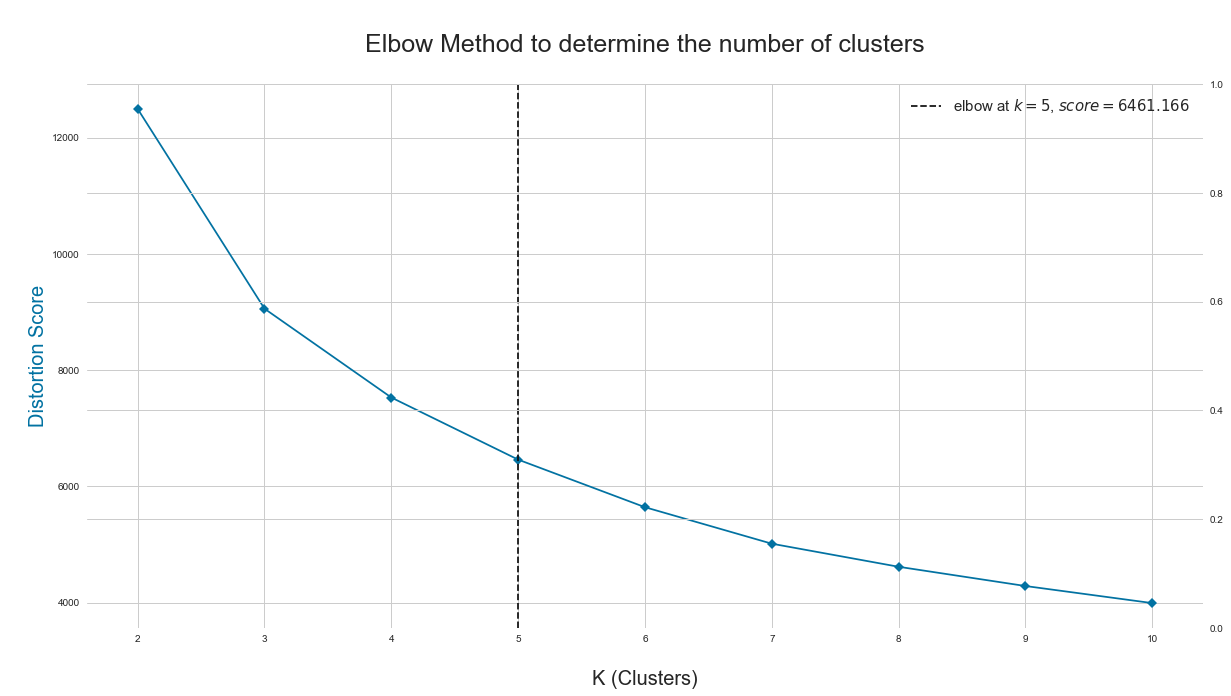

In [17]:
_, axes = plt.subplots(figsize = (20, 10))
Elbow_Km = KElbowVisualizer(KMeans(), k = 10, timings = False, locate_elbow = True)
Elbow_Km.fit(PCA_customer_data)

axes.set_title("\nElbow Method to determine the number of clusters\n", fontsize = 25)
axes2 = axes.twinx()

axes.set_xlabel("\nK (Clusters)", fontsize = 20)
axes.set_ylabel("\nDistortion Score", fontsize = 20, color = 'b')
axes.legend(fontsize = 15).set_visible(True)

sns.despine(left = True, bottom = True)
plt.show()

**Insights from the above Elbow Method:**

1. We will use k = 5, thus there will be five clusters in our dataset.
2. We will use KMeans Algorithm for clustering.

In [18]:
Km = KMeans(n_clusters = 5, random_state = 36)

y_km = Km.fit_predict(PCA_customer_data)
customer_data["Clusters"] = y_km
PCA_customer_data["Clusters"] = y_km

### Cluster Analysis

In [19]:
color_palette = ["#EB4949","#C36CF6", "#039B45","#085EC1", "#FFBF00"]

#### Total Item Spending X Income

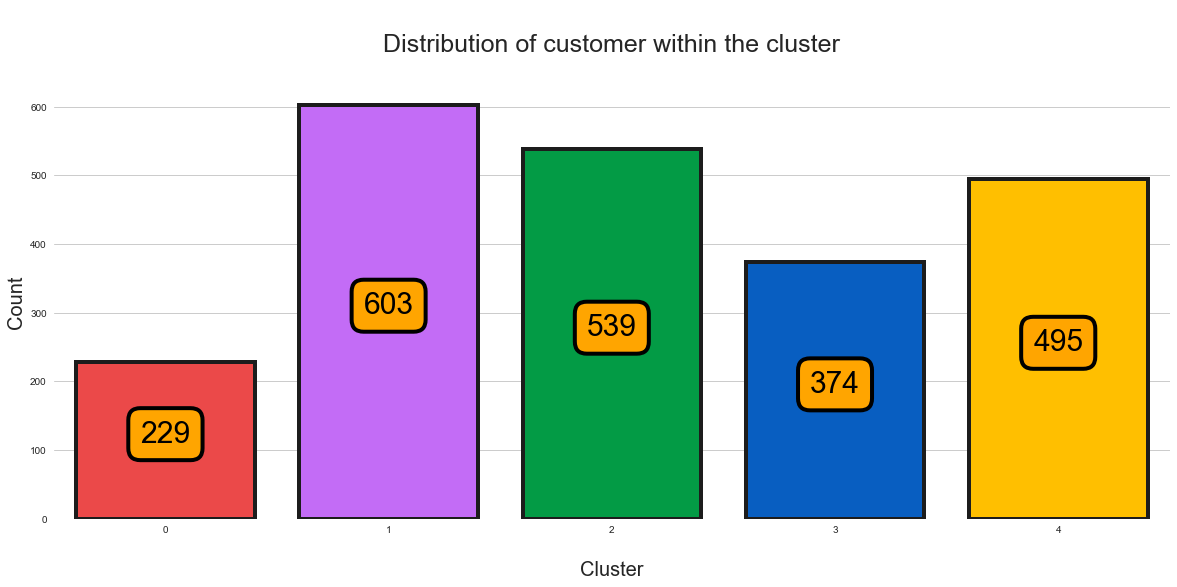

In [20]:
plt.subplots(figsize = (20, 8))
p = sns.countplot(x = customer_data["Clusters"], palette = color_palette, saturation = 1, edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_yscale("linear")
p.axes.set_title("\nDistribution of customer within the cluster\n", fontsize = 25)
p.axes.set_ylabel("Count", fontsize = 20)
p.axes.set_xlabel("\nCluster", fontsize = 20)
p.axes.set_xticklabels(p.get_xticklabels(), rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 6, size = 30, color = "black", rotation=0, bbox={"boxstyle" : "round", "pad" : 0.4, "facecolor" : "orange", "edgecolor" : "black", "linewidth" : 4, "alpha" : 1})

sns.despine(left = True, bottom = True)
plt.show()

**Insights from the cluster distribution:**

* Cluster 1: 539 Customers
* Cluster 2: 229 Customers
* Cluster 3: 603 Customers
* Cluster 4: 495 Customers
* Cluster 5: 374 Customers


The clusters seem to have an almost uniform distribution, we will analyse what makes these cluster differernt from each other. 

In [21]:
print(f"Let's have a look on the dataset after clustering :")

fig = go.Figure(data = [go.Scatter3d(x=x, y=y, z=z,mode='markers',
                marker = dict(size=10, color=PCA_customer_data["Clusters"],colorscale=color_palette, opacity=1))])
fig.update_layout(title=dict(text= "Dataset After Clustering[3D Projection]",
                             y=0.97,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  scene=dict(xaxis = dict(title="col1",backgroundcolor="#D4C8BA",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white"),
                             yaxis = dict(title="col2",backgroundcolor="#D4C8BA",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white"),
                             zaxis = dict(title="col3",backgroundcolor="#D4C8BA",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white")),
                  margin=dict(l=0, r=0, b=0, t=0),paper_bgcolor="#D4C8BA")
fig.show()

Let's have a look on the dataset after clustering :


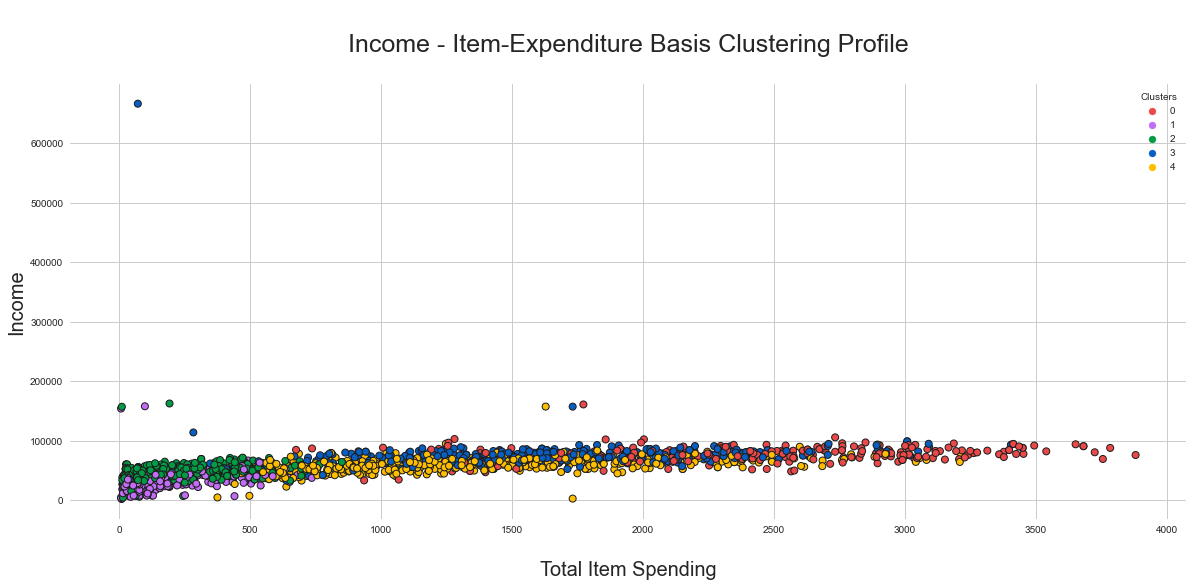

In [22]:
_, axes = plt.subplots(figsize=(20,8))
sns.scatterplot(x = customer_data["Itm_Total"], y = customer_data["Income"], hue = customer_data["Clusters"], palette = color_palette, sizes = 60, alpha=1, edgecolor = "#1c1c1c", linewidth = 1)
axes.set_title("\nIncome - Item-Expenditure Basis Clustering Profile\n", fontsize=25)
axes.set_ylabel("Income", fontsize=20)
axes.set_xlabel("\nTotal Item Spending", fontsize=20)

sns.despine(left = True, bottom = True)
plt.show()

**Inight from the above distribution**

1. We can see within cluster 4, the customer seems to have very high income causing the customer to become an OUTLIER within the customer base.

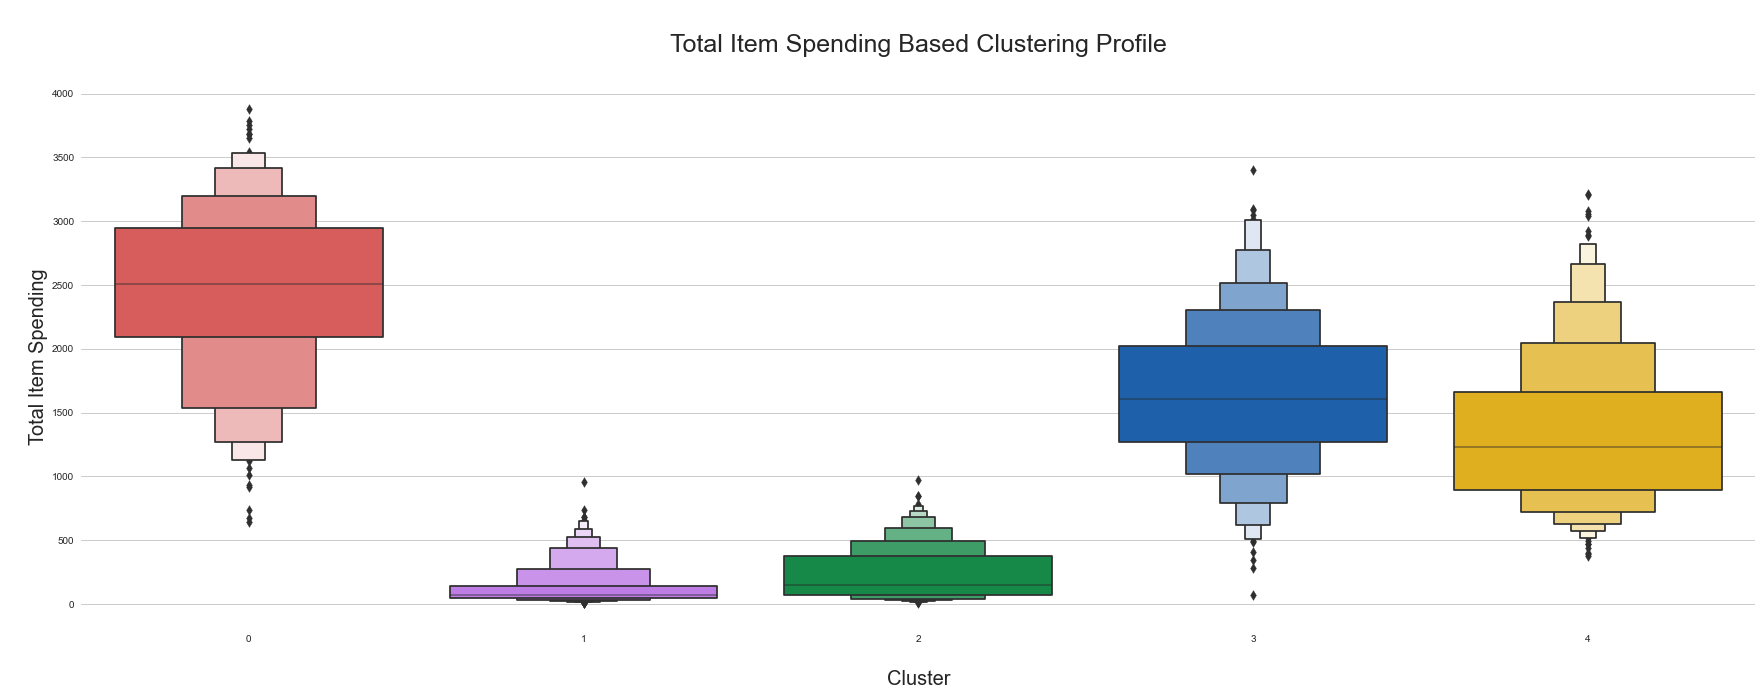

In [23]:
_, axes = plt.subplots(figsize = (30, 10))
sns.boxenplot(x = customer_data["Clusters"], y = customer_data["Itm_Total"], palette = color_palette)

axes.set_title("\nTotal Item Spending Based Clustering Profile\n", fontsize = 25)
axes.set_ylabel("\nTotal Item Spending", fontsize = 20)
axes.set_xlabel("\nCluster", fontsize = 20)

sns.despine(left = True, bottom = True)
plt.show()

**Insights:**

* Most of the cluster 0 customers spending range is in between 0 to 800.
* Most of the cluster 1 customers spending range is in between 1000 to 3600.
* Most of the cluster 2 customers spending range is in between 0 to 750.
* Most of the cluster 3 customers spending range is in between 500 to 2800.
* Most of the cluster 4 customers spending range is in between 750 to 3000.

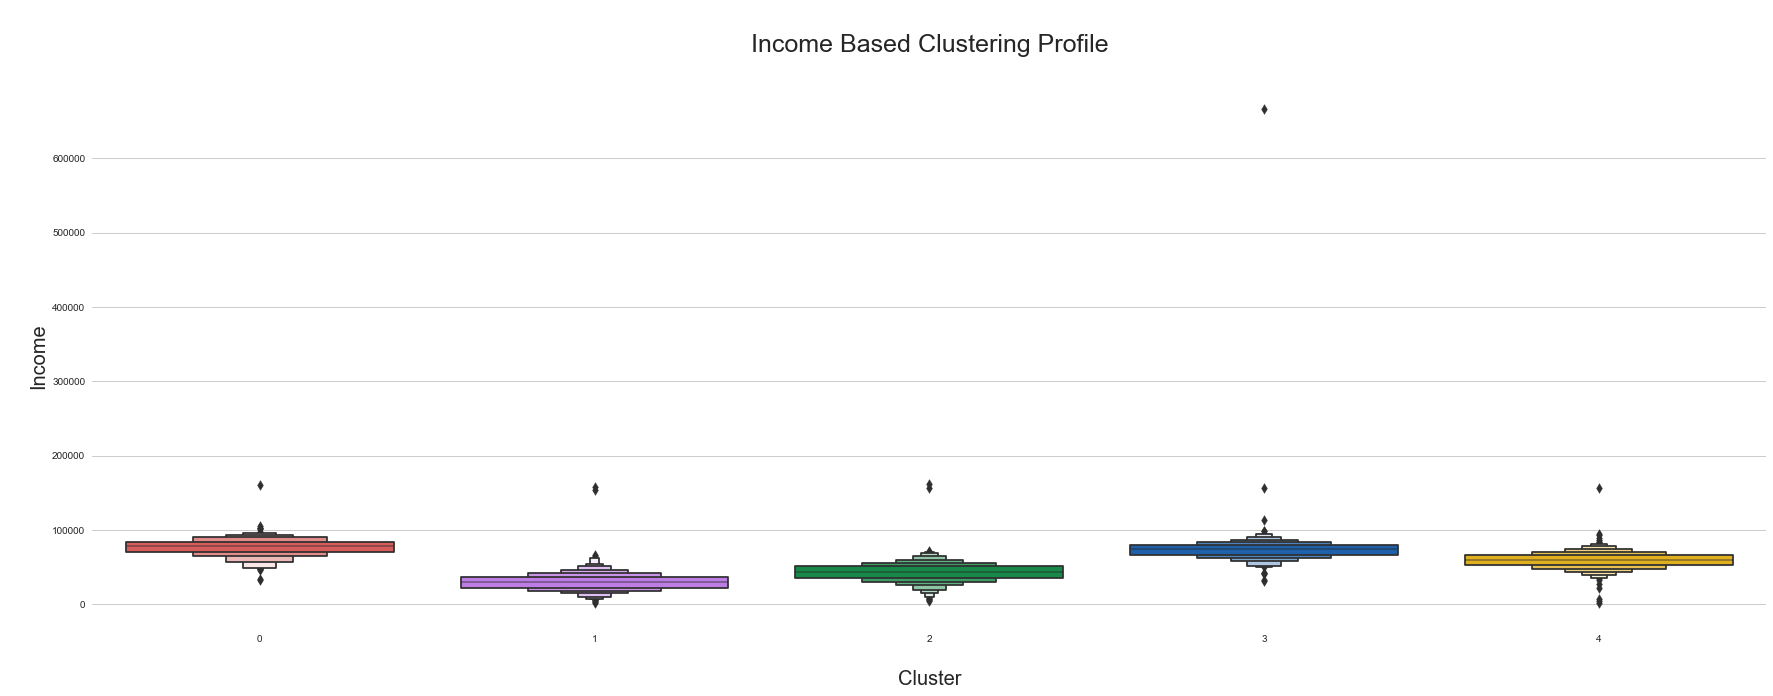

In [24]:
_, axes = plt.subplots(figsize = (30, 10))
sns.boxenplot(x = customer_data["Clusters"], y = customer_data["Income"], palette = color_palette)

axes.set_title("\nIncome Based Clustering Profile\n", fontsize = 25)
axes.set_ylabel("\nIncome", fontsize = 20)
axes.set_xlabel("\nCluster", fontsize = 20)

sns.despine(left = True, bottom = True)
plt.show()

**Insights:**

* Most of the cluster 0 customers income range is in between 0 to 75000.
* Most of the cluster 1 customers spending range is in between 70000 to 100000.
* Most of the cluster 2 customers spending range is in between 10000 to 55000.
* Most of the cluster 3 customers spending range is in between 50000 to 80000.
* Most of the cluster 4 customers spending range is in between 60000 to 100000.

#### Cluster profiling based on Total Item Spending X __
**We will analyse the customer by comparing total item spending and childern, age, education level, marital status, number of kids, days since joining.**

In [25]:
def density_cluster(parameter):
    _, axes = plt.subplots(figsize = (30, 12))
    sns.kdeplot(x = customer_data[parameter], y = customer_data["Itm_Total"], hue = customer_data["Clusters"], kind="kde", height = 10, palette = color_palette)
    axes.set_title(f"\nClustering Profile On {parameter}\n", fontsize = 25)
    axes.set_ylabel("Spending", fontsize = 20)
    axes.set_xlabel(f"\n{parameter}", fontsize = 20)
    
    sns.despine(left = True, bottom = True)
    plt.show()

##### total item spending X children

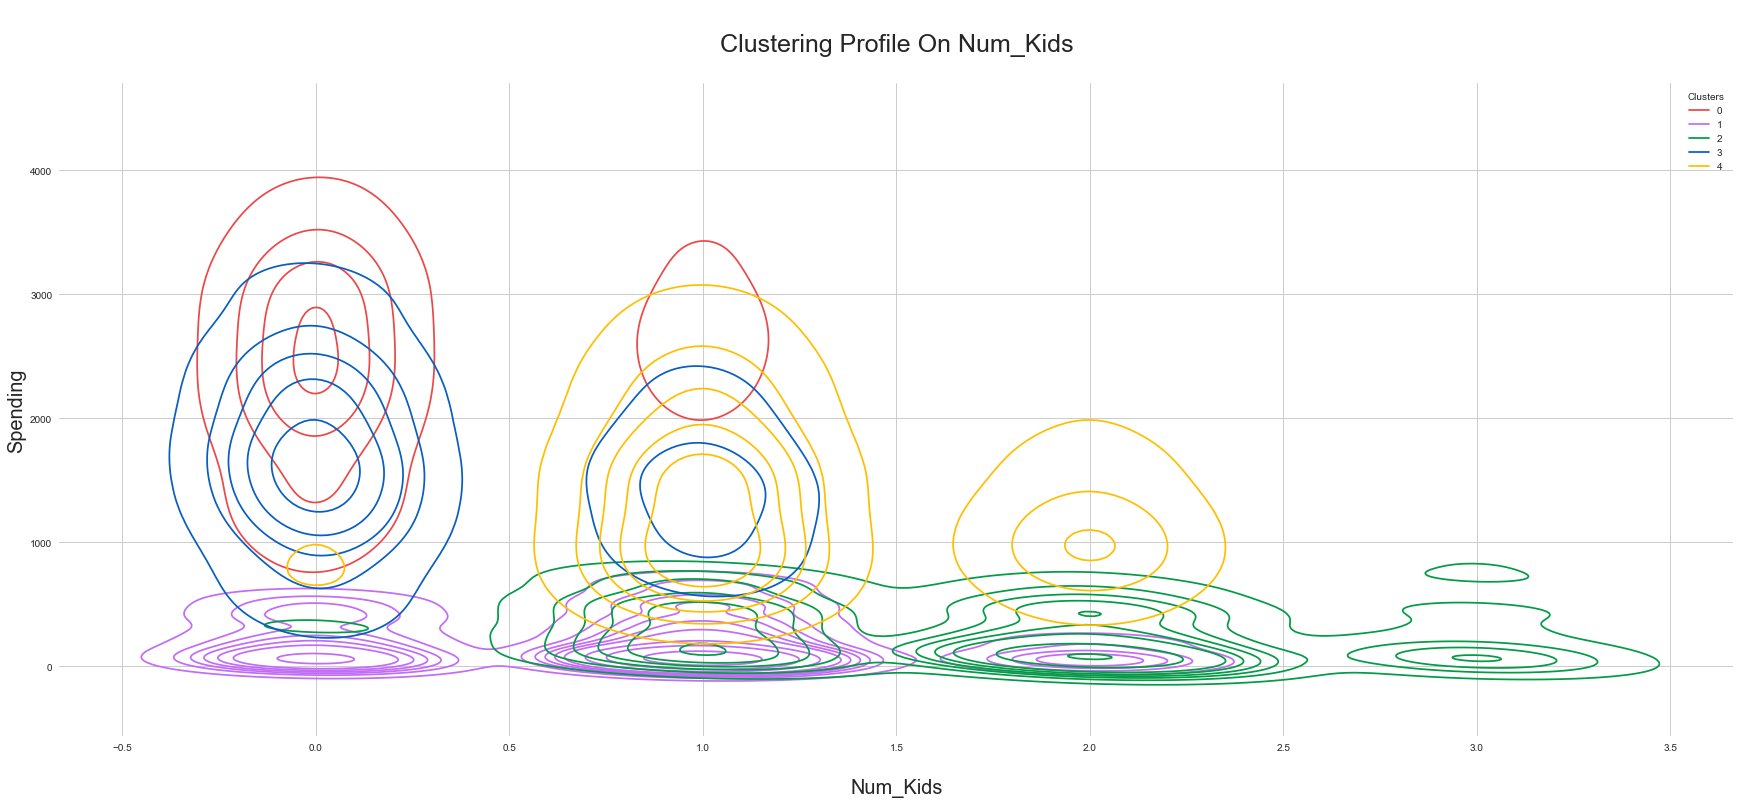

In [26]:
#cluster comparison of total item spending with total number of kids in the household
density_cluster("Num_Kids")

**Insights:**

* Most of the customers of cluster 0 have on an average two children, very few having 0 children. Their spending range is in between 0 to 800.
* Most of the customers of cluster 1 don't have any child, only a few have one. Their spending range is in between 800 to 4000.
* Most of the customers of cluster 2 have at most one child, some having two and none, three. Their spending range is in between 0 to 700.
* Most of the customers of cluster 3 have one child, a few having two and very few having none. None of them has three children. Their spending range is in between 250 to 3000.
* Most of the customers of cluster 4 have no children, with a few having one child. None of them has more than two children. Their spending range is in between 250 to 3250.

##### total item spending X Education Level

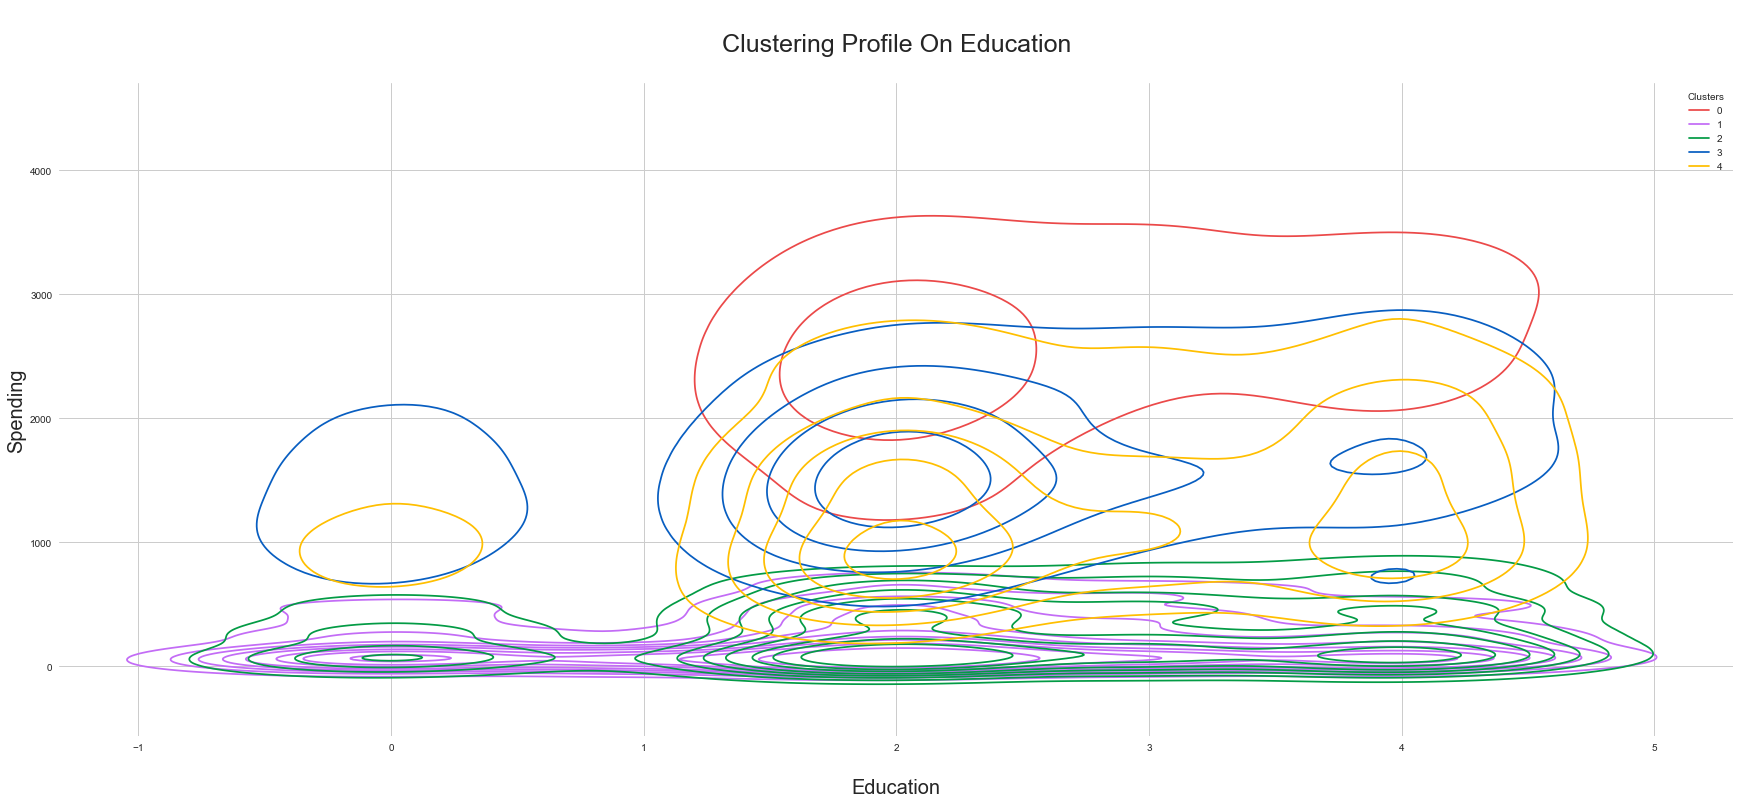

In [27]:
#cluster comparison of total item spending with the education level
density_cluster("Education")

**Insights:**

1. Phd: 4 : Postgraduate 
2. Master: 3 : Postgraduate 
3. Graduate: 2 : Graduate
4. Basic: 1 : Undergraduate
5. 2nd Cycle: 0 : Undergraduate

* Most of the customers of cluster 0 are graduate or in postgraduate level. Few are in undergraduate level. Their spending range is in between 0 to 800 and those in undergreaduate have spending between 0 to 500.
* Most of the customers of cluster 1 are graduate or in postgraduate level, none in undergraduate level. Their spending range is in between 1200 to 3500.
* Most of the customers of cluster 2 are graduate, post graduate and in undergraduate level. Their spending range is in between 0 to 250.
* Most of the customers of cluster 3 are graduate or in postgraduate level and some are in undergraduate level. Their spending range is in between 500 to 2500.
* Most of the customers of cluster 4 are graduate or in postgraduate level and some are in undergraduate level. Their spending range is in between 500 to 2500.

##### total item spending X Age

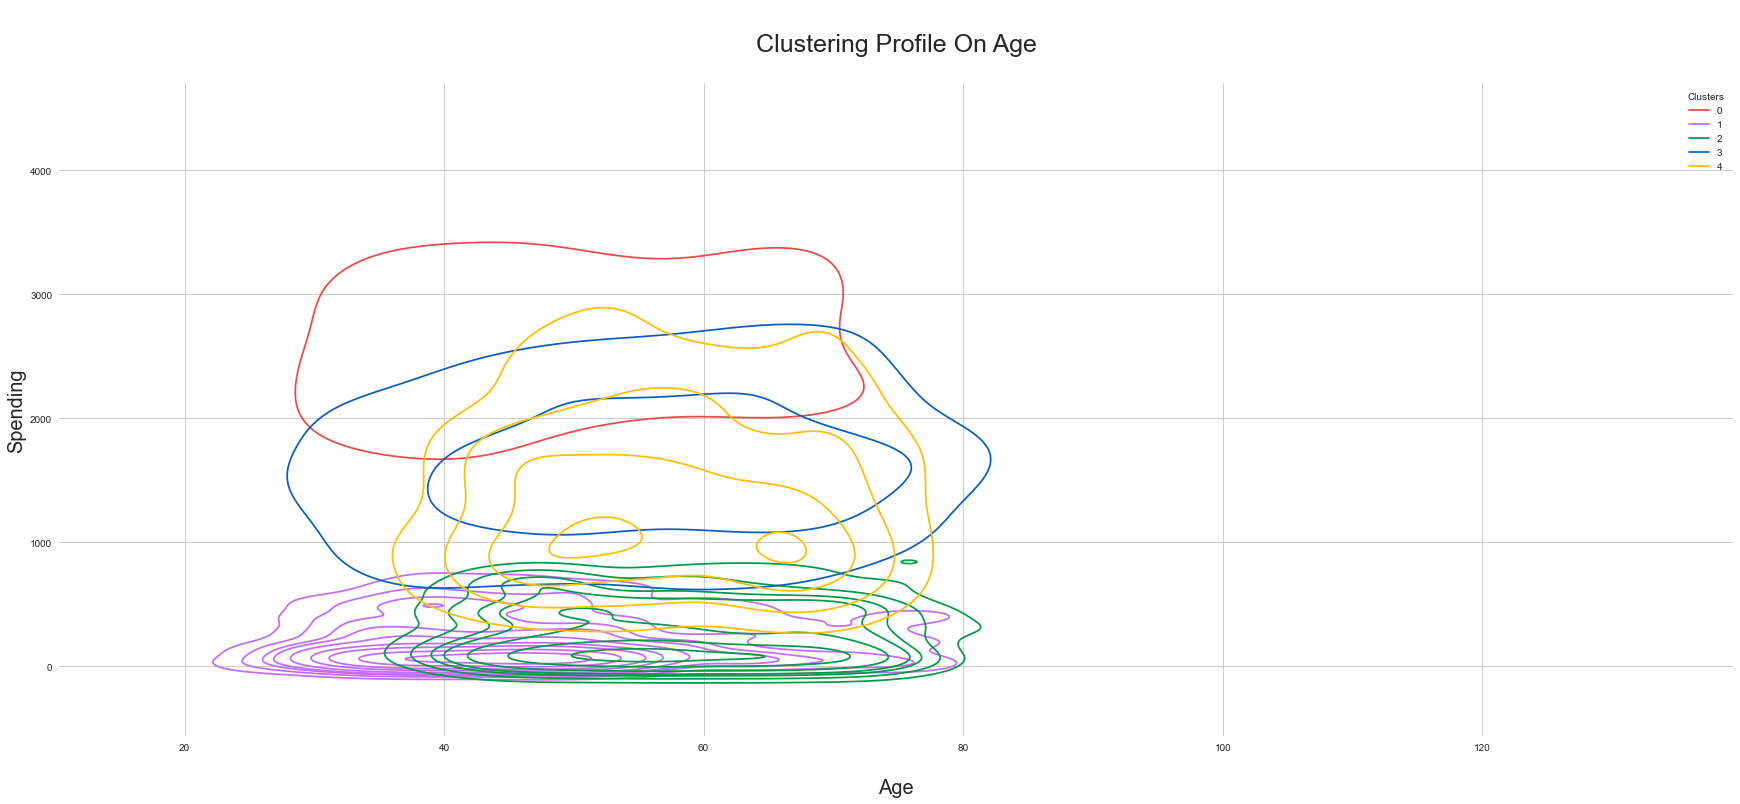

In [28]:
#cluster comparison of total item spending with their Age
density_cluster("Age")

**Insights:**

* Most of the customers of cluster 0 have age range in between 35 to 80. Their spending range is in between 0 to 800.
* Most of the customers of cluster 1 have age range in between 30 to 70. Their spending range is in between 1800 to 3400.
* Most of the customers of cluster 2 have age range in between 20 to 60. Their spending range is in between 0 to 800.
* Most of the customers of cluster 3 have age range in between 40 to 80. Their spending range is in between 500 to 3000.
* Most of the customers of cluster 4 have age range in between 30 to 80. Their spending range is in between 700 to 2800.

##### total item spending X Marital Status

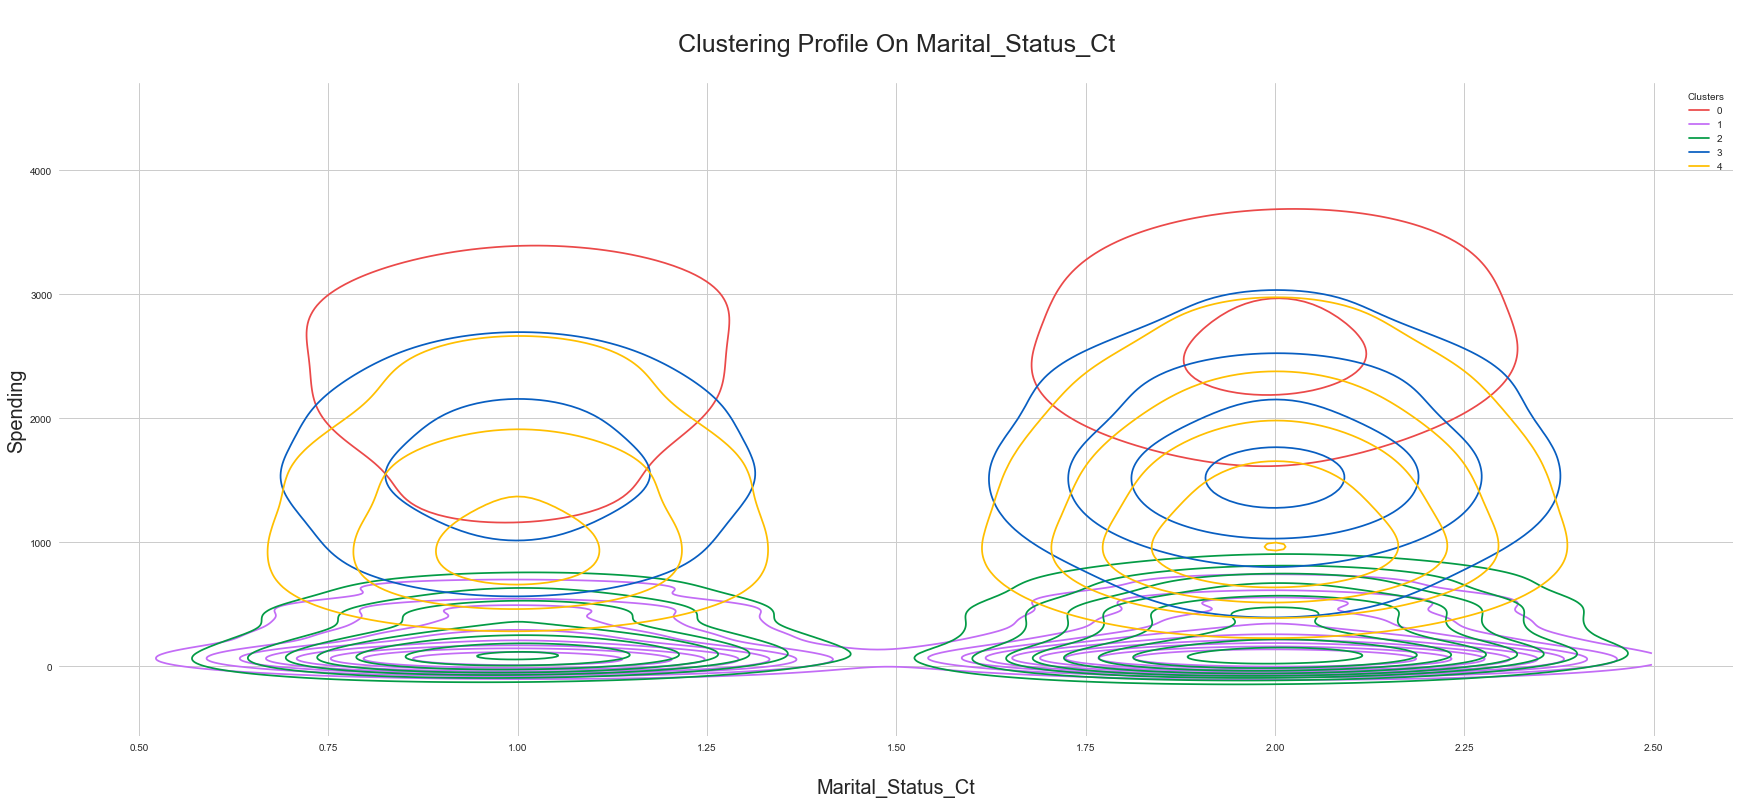

In [29]:
#cluster comparison of total item spending with their Marital Status
density_cluster("Marital_Status_Ct")

**Insights:**

1. Single or Divorcee or Widowed: 1
2. Married or Together: 2

* Some of the customers of cluster 0 are married and some are single. Their spending range is in between 0 to 800.
* Some of the customers of cluster 1 are married and some are single. Their spending range is in between 1200 to 3500.
* Some of the customers of cluster 2 are married and some are single. Their spending range is in between 0 to 800.
* Some of the customers of cluster 3 are married and some are single. Their spending range is in between 400 to 2500.
* Some of the customers of cluster 4 are married and some are single. Their spending range is in between 500 to 2500.

##### total item spending X Parental Status

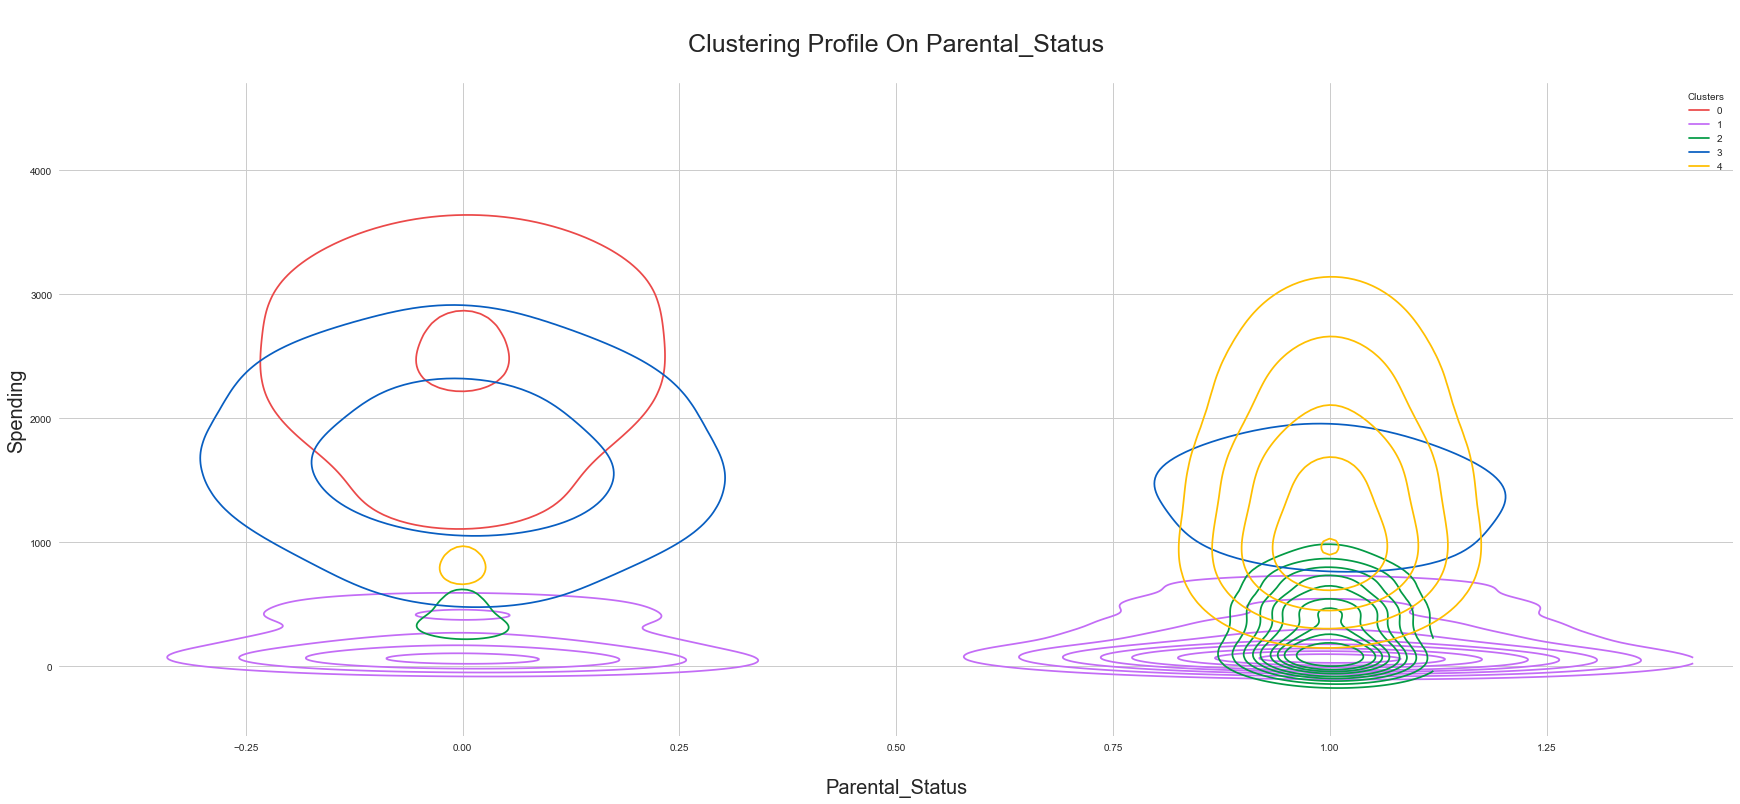

In [30]:
#cluster comparison of total item spending with their Parental Status i.e., they have kids in the household

#we will make a column to store their parental status
customer_data["Parental_Status"] = np.where(customer_data["Num_Kids"] > 0, 1, 0)

density_cluster("Parental_Status")

**Insights:**

1. Parents: 1
2. Not Parents: 0

* Most of the customers of cluster 0 are parents and very few are not parents. Their spending range is in between 0 to 1000.
* All of the customers of cluster 1 are not parents. Their spending range is in between 1000 to 3500.
* Majority of the customers of cluster 2 are parents. Their spending range is in between 0 to 800.
* Majority of the customers of cluster 3 are parents. Their spending range is in between 250 to 3200.
* Majority of the customers of cluster 4 are non parents. Their spending range is in between 250 to 2900.

##### total item spending X Customer Loyalty i.e. their days of joining

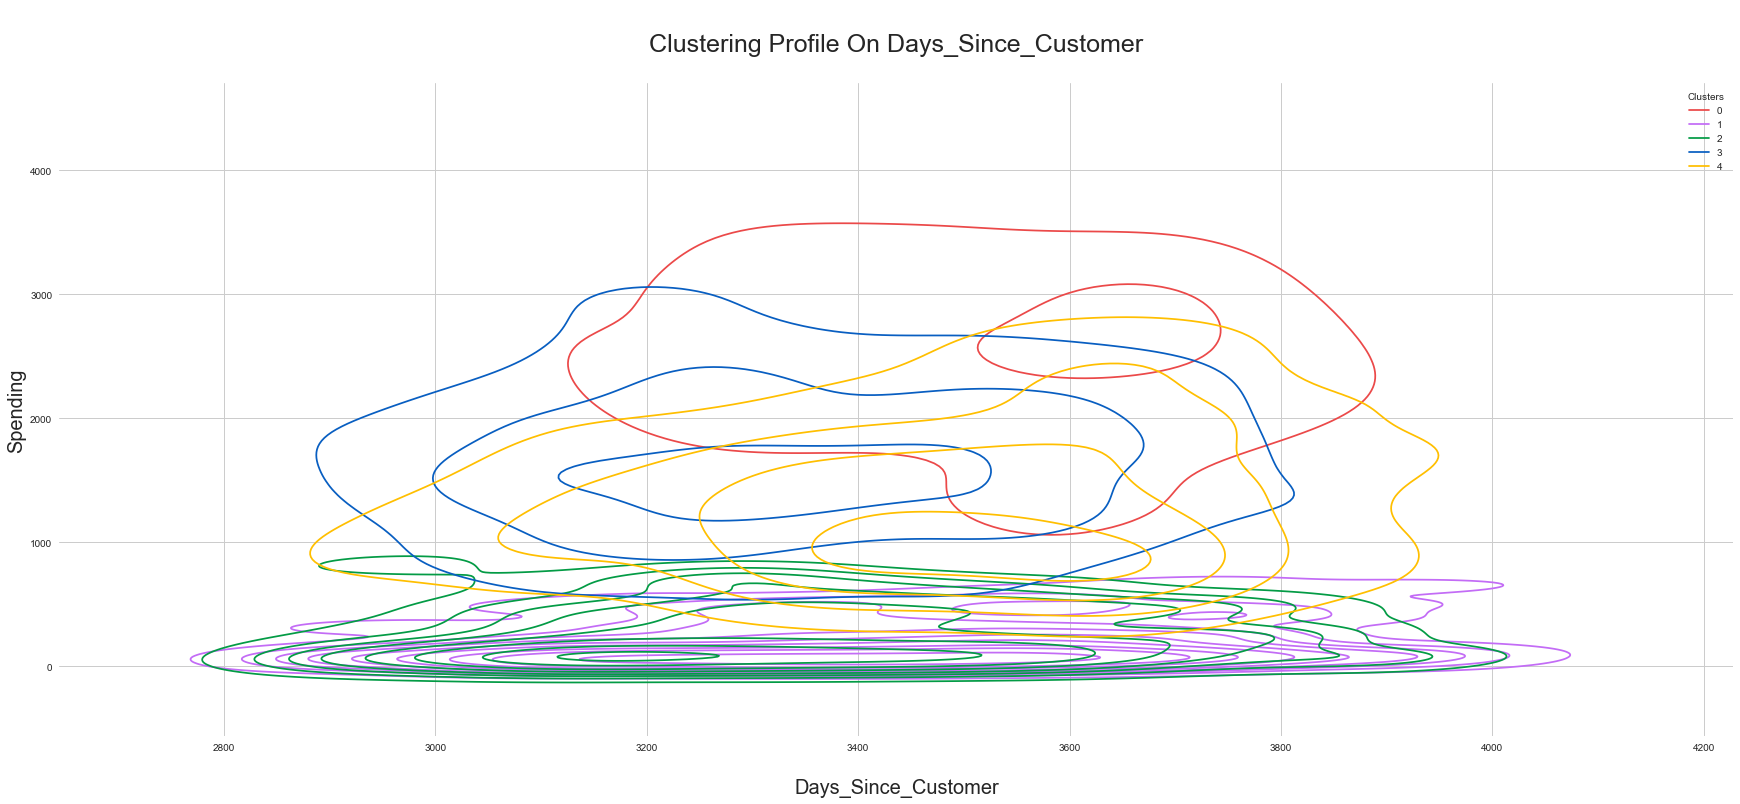

In [31]:
#cluster comparison of total item spending with their days of joining
density_cluster("Days_Since_Customer")

**Insights:**

* Most of the customers of cluster 0 are customer for 2800 to 4000 days. Their spending range is in between 0 to 1000.
* Most of the customers of cluster 1 are customer for 3100 to 3900 days. Their spending range is in between 1000 to 3500.
* Most of the customers of cluster 2 are customer for 2800 to 4000 days. Their spending range is in between 0 to 1000.
* Most of the customers of cluster 3 are customer for 2900 to 3900 days. Their spending range is in between 500 to 3000.
* Most of the customers of cluster 4 are customer for 2900 to 3000 days. Their spending range is in between 750 to 3000.

## Cluster Profiles

### Cluster 0

* Income range is in between 0 to 75000 and spending range is in between 0 to 800
* Age range in between 35 to 80
* Mostly graduate or post graduate educational level, very few in undergrad
* Can be married and unmarried as well
* Most of them are parents
* Most have on an average two children
* Customer for at least 2800 days

### Cluster 1

* Income range is in between 70000 to 100000 and spending range is in between 1000 to 3600
* Age range in between 30 to 70
* All have completed graduation
* Can be married and unmarried as well
* They do not have any children apart from a few exception of 1 child
* Have at most one child, majority have no child.
* Customer for at least 3100 days

### Cluster 2

* Income range is in between 10000 to 55000 and spending range is in between 0 to 750
* Age range in between 20 to 60
* Belong to all education level
* Can be married and unmarried as well
* All of them are parents
* All have children, most have one or two children
* Customer for at least 2800  days

### Cluster 3

* Income range is in between 50000 to 50000 and spending range is in between 500 to 2800
* Age range in between 40 to 80
* Mostly graduate or post graduate educational level, very few in undergrad
* Can be married and unmarried as well
* Most of them are parents
* Most have at most one child
* Customer for at least 2900 days

### Cluster 4

* Income range is in between 60000 to 100000 and spending range is in between 750 to 3000
* Age range in between 30 to 80
* Mostly graduate or post graduate educational level, very few in undergrad
* Can be married and unmarried as well
* Most of them are non parents
* Most have no children, and some have one child
* Customer for at least 2900 days